In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data_path = 'E:/Data Science Project/Unified Mentor Project/Intership Project/Project 10_ Heart Disease Diagnostic Analysis/Heart Disease data/Heart Disease data.csv'
heart_disease_data = pd.read_csv(data_path)

# Display the first few rows of the dataset
heart_disease_data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
# Display the first few rows of the dataset
print(heart_disease_data.head())

# Check for missing values and data types
print(heart_disease_data.info())

# Basic statistics of the dataset
print(heart_disease_data.describe())

# Check for missing values in the dataset
print(heart_disease_data.isnull().sum())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 

C:\Users\heman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


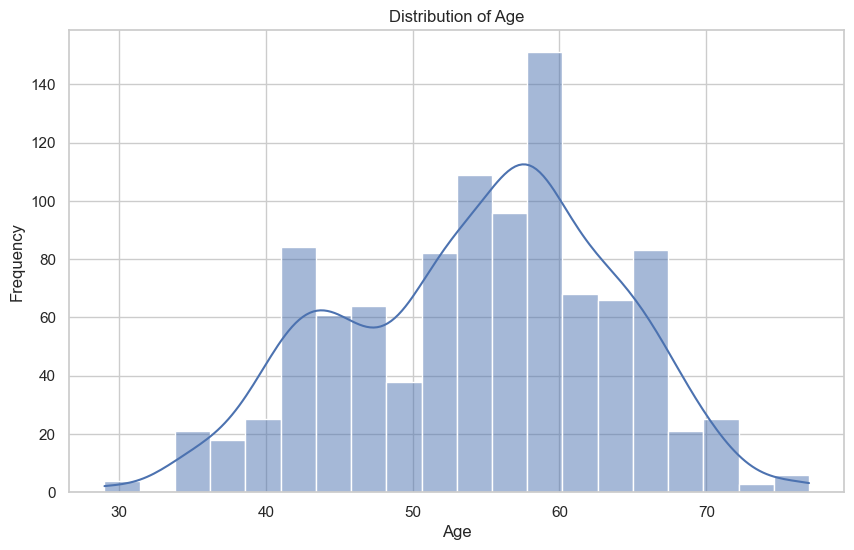

count    1025.000000
mean       54.434146
std         9.072290
min        29.000000
25%        48.000000
50%        56.000000
75%        61.000000
max        77.000000
Name: age, dtype: float64


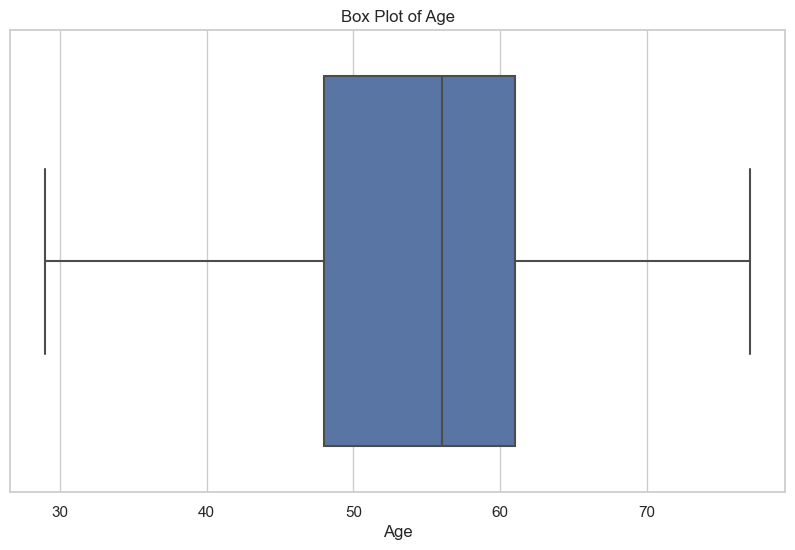

In [4]:
# Set the style of the visualization
sns.set(style="whitegrid")

# 1. Distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(heart_disease_data['age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Summary statistics for age
age_summary = heart_disease_data['age'].describe()
print(age_summary)

# Box plot for age
plt.figure(figsize=(10, 6))
sns.boxplot(x=heart_disease_data['age'])
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()

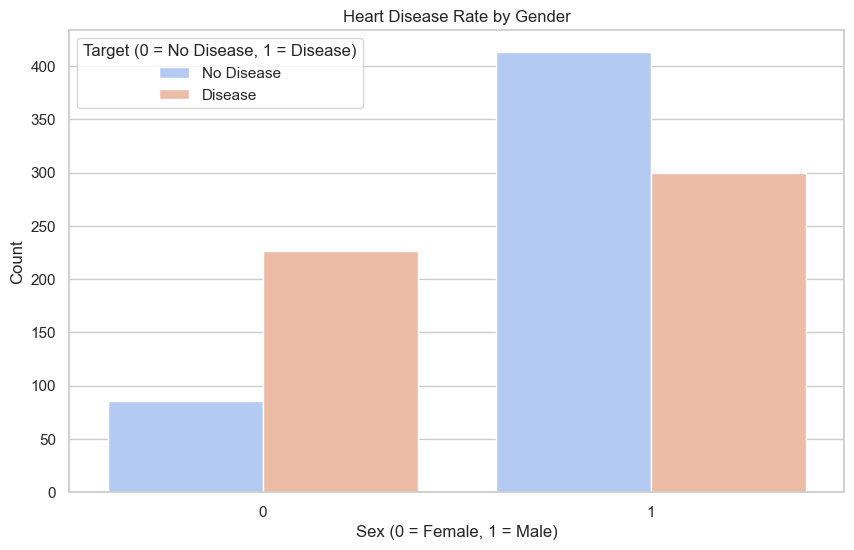

In [5]:
# 2. Heart disease rate by gender
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', hue=heart_disease_data['target'].astype(str), data=heart_disease_data, palette='coolwarm')
plt.title('Heart Disease Rate by Gender')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.legend(title='Target (0 = No Disease, 1 = Disease)', labels=['No Disease', 'Disease'])
plt.show()

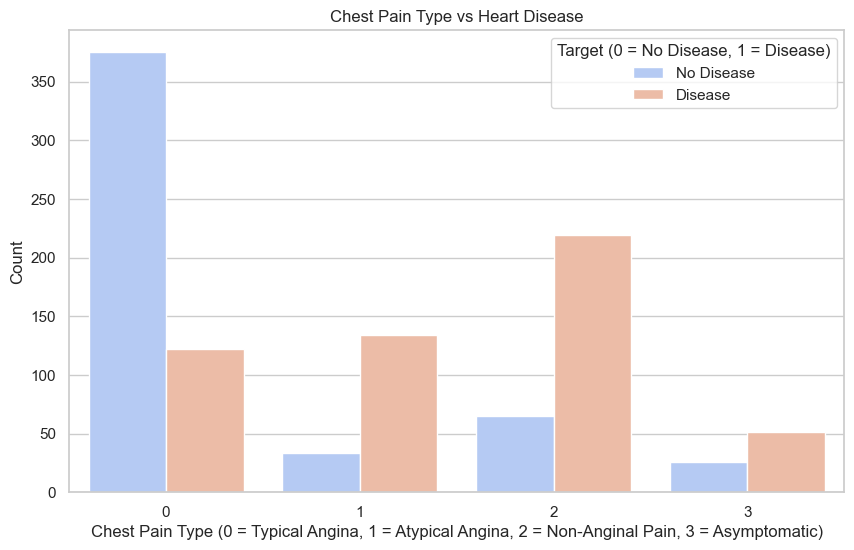

In [9]:
# 3. Chest pain type vs. heart disease
plt.figure(figsize=(10, 6))
sns.countplot(x='cp', hue=heart_disease_data['target'].astype(str), data=heart_disease_data, palette='coolwarm')
plt.title('Chest Pain Type vs Heart Disease')
plt.xlabel('Chest Pain Type (0 = Typical Angina, 1 = Atypical Angina, 2 = Non-Anginal Pain, 3 = Asymptomatic)')
plt.ylabel('Count')
plt.legend(title='Target (0 = No Disease, 1 = Disease)', labels=['No Disease', 'Disease'])
plt.show()

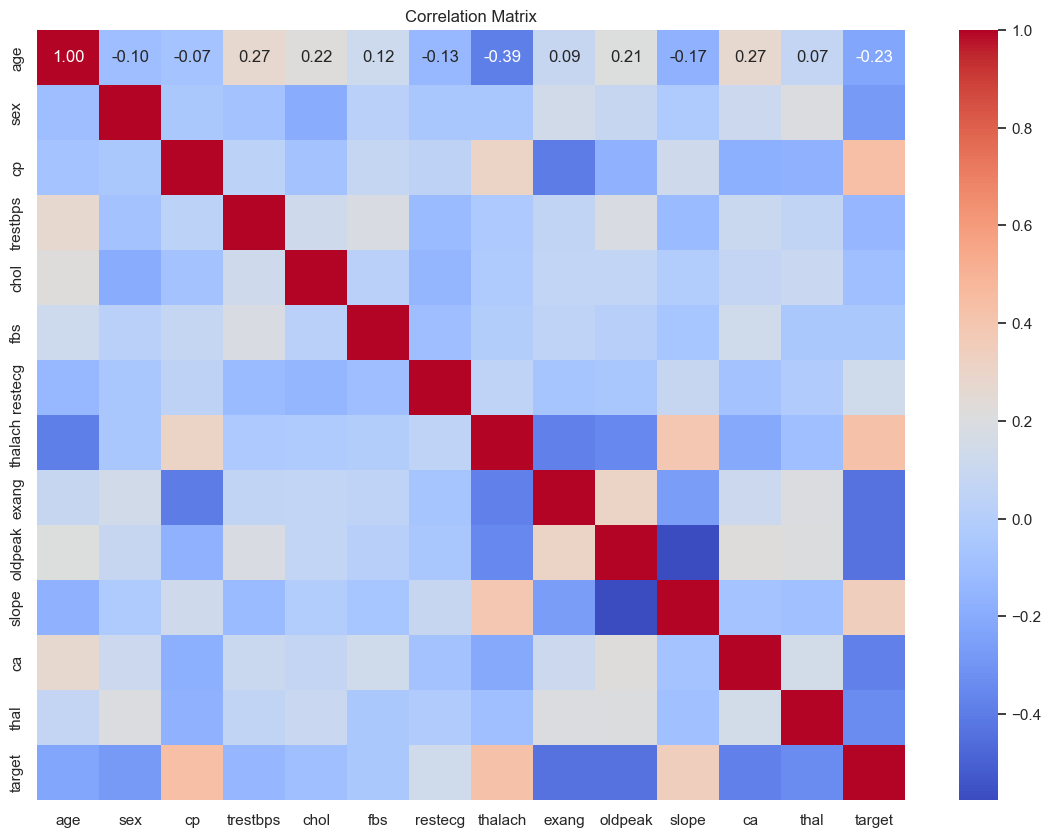

In [13]:
# 4. Correlation matrix
plt.figure(figsize=(14, 10))
correlation_matrix = heart_disease_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [15]:
heart_disease_by_gender = heart_disease_data.groupby('sex')['target'].mean() * 100
print(f"Percentage of men with heart disease: {heart_disease_by_gender[1]:.2f}%")
print(f"Percentage of women with heart disease: {heart_disease_by_gender[0]:.2f}%")


Percentage of men with heart disease: 42.08%
Percentage of women with heart disease: 72.44%


In [17]:
# Crosstab of age and heart disease
age_target_crosstab = pd.crosstab(heart_disease_data['age'], heart_disease_data['target'])
print(age_target_crosstab)

# Crosstab of age and sex
age_sex_crosstab = pd.crosstab(heart_disease_data['age'], heart_disease_data['sex'])
print(age_sex_crosstab)

target   0   1
age           
29       0   4
34       0   6
35       7   8
37       0   6
38       4   8
39       4  10
40       8   3
41       3  29
42       4  22
43      11  15
44      10  26
45       6  19
46      11  12
47       8  10
48      11  12
49       8   9
50       9  12
51      10  29
52      15  28
53       8  18
54      21  32
55      20  10
56      22  17
57      36  21
58      44  24
59      31  15
60      27  10
61      28   3
62      24  13
63      23   9
64      15  19
65      15  12
66      11  14
67      22   9
68       6   6
69       3   6
70      11   3
71       0  11
74       0   3
76       0   3
77       3   0
sex   0   1
age        
29    0   4
34    3   3
35    4  11
37    3   3
38    0  12
39    7   7
40    0  11
41   12  20
42    6  20
43    7  19
44    6  30
45   10  15
46    9  14
47    0  18
48    3  20
49    6  11
50    9  12
51   12  27
52    3  40
53    9  17
54   15  38
55   15  15
56   10  29
57   12  45
58   21  47
59    3  43
60   13  24
61    8

C:\Users\heman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


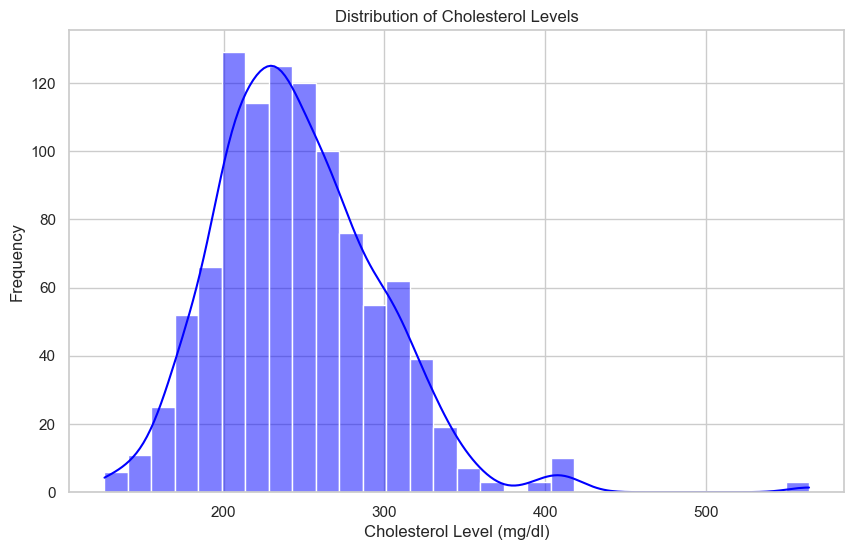

In [19]:
# Histogram of cholesterol levels
plt.figure(figsize=(10, 6))
sns.histplot(heart_disease_data['chol'], kde=True, bins=30, color='blue')
plt.title('Distribution of Cholesterol Levels')
plt.xlabel('Cholesterol Level (mg/dl)')
plt.ylabel('Frequency')
plt.show()


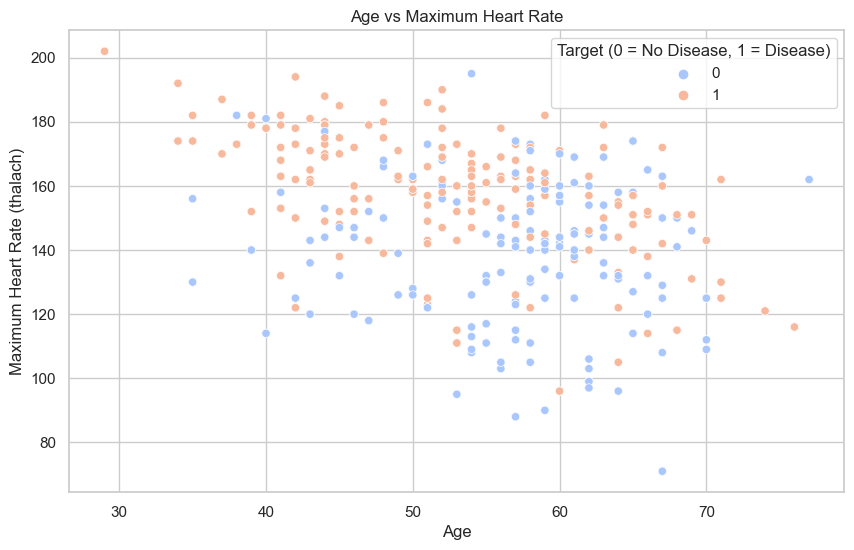

In [21]:
# Scatter plot of age vs maximum heart rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='thalach', hue='target', data=heart_disease_data, palette='coolwarm')
plt.title('Age vs Maximum Heart Rate')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate (thalach)')
plt.legend(title='Target (0 = No Disease, 1 = Disease)')
plt.show()


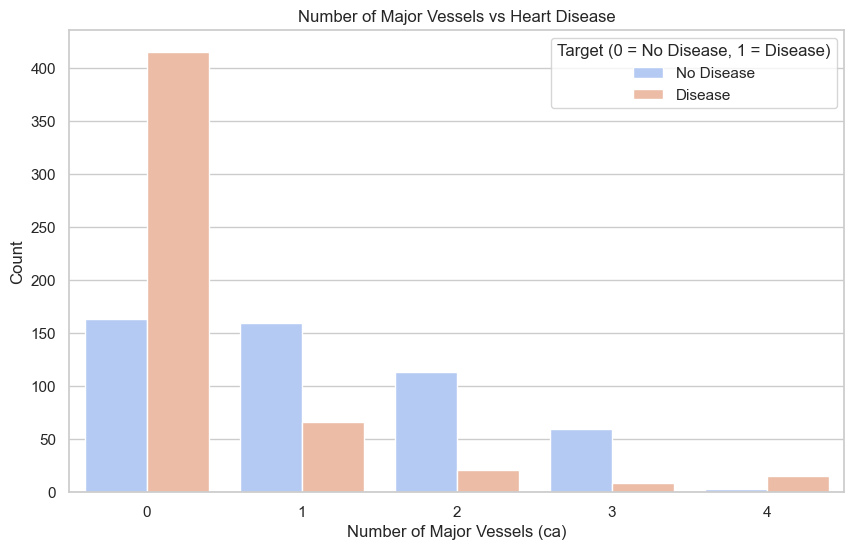

In [23]:
# Count plot of number of major vessels vs heart disease
plt.figure(figsize=(10, 6))
sns.countplot(x='ca', hue=heart_disease_data['target'].astype(str), data=heart_disease_data, palette='coolwarm')
plt.title('Number of Major Vessels vs Heart Disease')
plt.xlabel('Number of Major Vessels (ca)')
plt.ylabel('Count')
plt.legend(title='Target (0 = No Disease, 1 = Disease)', labels=['No Disease', 'Disease'])
plt.show()


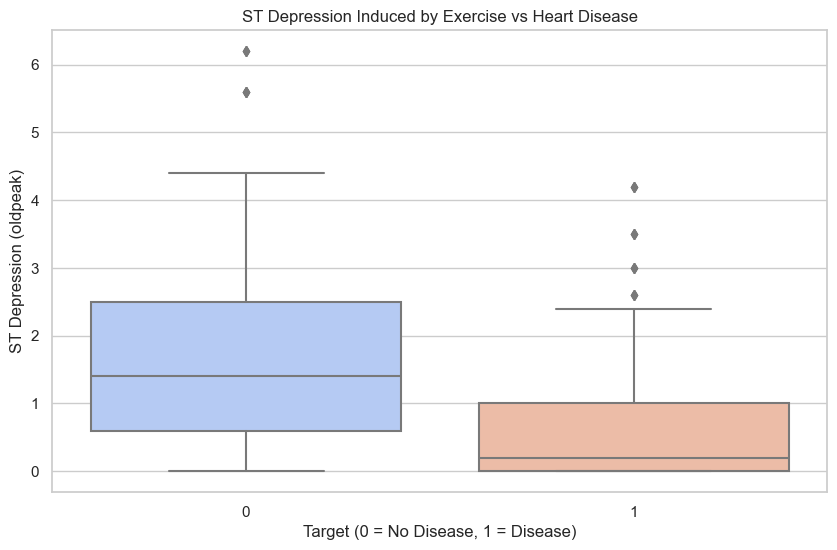

In [25]:
# Box plot of oldpeak vs heart disease
plt.figure(figsize=(10, 6))
sns.boxplot(x=heart_disease_data['target'].astype(str), y='oldpeak', data=heart_disease_data, palette='coolwarm')
plt.title('ST Depression Induced by Exercise vs Heart Disease')
plt.xlabel('Target (0 = No Disease, 1 = Disease)')
plt.ylabel('ST Depression (oldpeak)')
plt.show()


In [27]:
# Summary statistics for key variables
key_variables = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
summary_stats = heart_disease_data[key_variables].describe()
print(summary_stats)


               age     trestbps        chol      thalach      oldpeak  \
count  1025.000000  1025.000000  1025.00000  1025.000000  1025.000000   
mean     54.434146   131.611707   246.00000   149.114146     1.071512   
std       9.072290    17.516718    51.59251    23.005724     1.175053   
min      29.000000    94.000000   126.00000    71.000000     0.000000   
25%      48.000000   120.000000   211.00000   132.000000     0.000000   
50%      56.000000   130.000000   240.00000   152.000000     0.800000   
75%      61.000000   140.000000   275.00000   166.000000     1.800000   
max      77.000000   200.000000   564.00000   202.000000     6.200000   

                ca  
count  1025.000000  
mean      0.754146  
std       1.030798  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       4.000000  


In [29]:
# Crosstabulation of chest pain type and heart disease
cp_target_crosstab = pd.crosstab(heart_disease_data['cp'], heart_disease_data['target'])
print(cp_target_crosstab)

# Crosstabulation of fasting blood sugar and heart disease
fbs_target_crosstab = pd.crosstab(heart_disease_data['fbs'], heart_disease_data['target'])
print(fbs_target_crosstab)


target    0    1
cp              
0       375  122
1        33  134
2        65  219
3        26   51
target    0    1
fbs             
0       417  455
1        82   71
